In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
pd.set_option('display.max_columns', None

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [7]:
df.shape

(3554, 18)

In [8]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7586.0        3         2       2       2.0    New property   
1          8597.0        2         2       2       4.0    New property   
2          5470.0        2         2       1      17.0    New property   
3          8020.0        3         4      3+      10.0  Moderately old   
4          9023.0        2         2       1       5.0  Moderately old   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0           0             0           0           0       0   
1         1226.0           1             1           0           0       0   
2         1000.0           0             0           0           0       0   
3         1615.0           0             1           0           0       1   
4          581.0           0             0           1           0       0   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            49  
3                1           174  
4                0           159

In [9]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [10]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82        3         2       2       2.0   
1          flat   sector 89   0.95        2         2       2       4.0   
2          flat  sohna road   0.32        2         2       1      17.0   
3          flat   sector 92   1.60        3         4      3+      10.0   
4          flat  sector 102   0.48        2         2       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New property          850.0           0             0           0   
1    New property         1226.0           1             1           0   
2    New property         1000.0           0             0           0   
3  Moderately old         1615.0           0             1           0   
4  Moderately old          581.0           0             0           1   

   pooja room  others  furnishing_type  luxury_score  
0           0       0                0             8  
1           0       0                0            38  
2           0       0                0            49  
3           0       1                1           174  
4           0       0                0           159

## Luxury_score

<Axes: >

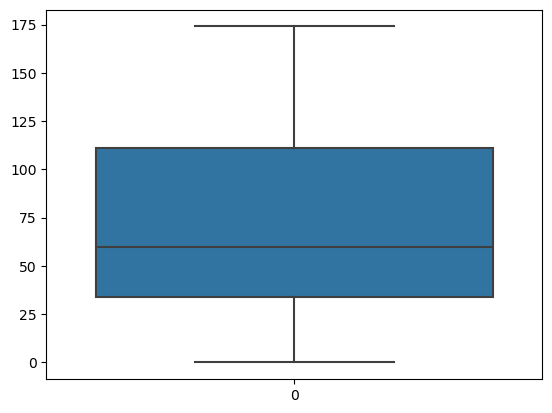

In [11]:
sns.boxplot(df['luxury_score'])

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82        3         2       2       2.0   
1          flat   sector 89   0.95        2         2       2       4.0   
2          flat  sohna road   0.32        2         2       1      17.0   
3          flat   sector 92   1.60        3         4      3+      10.0   
4          flat  sector 102   0.48        2         2       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New property          850.0           0             0           0   
1    New property         1226.0           1             1           0   
2    New property         1000.0           0             0           0   
3  Moderately old         1615.0           0             1           0   
4  Moderately old          581.0           0             0           1   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0           0       0                0             8             Low  
1           0       0                0            38             Low  
2           0       0                0            49             Low  
3           0       1                1           174            High  
4           0       0                0           159            High

## floornum

<Axes: >

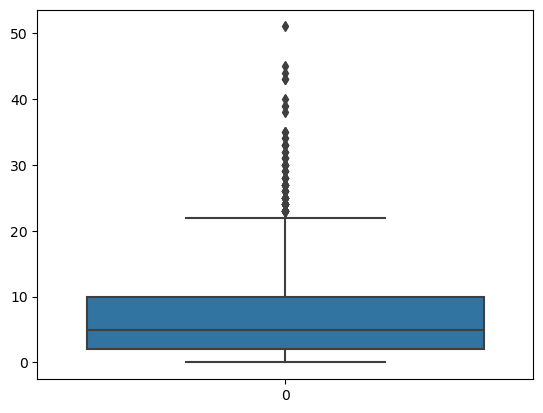

In [15]:
sns.boxplot(df['floorNum'])

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82        3         2       2       2.0   
1          flat   sector 89   0.95        2         2       2       4.0   
2          flat  sohna road   0.32        2         2       1      17.0   
3          flat   sector 92   1.60        3         4      3+      10.0   
4          flat  sector 102   0.48        2         2       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New property          850.0           0             0           0   
1    New property         1226.0           1             1           0   
2    New property         1000.0           0             0           0   
3  Moderately old         1615.0           0             1           0   
4  Moderately old          581.0           0             0           1   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0           0       0                0             8             Low   
1           0       0                0            38             Low   
2           0       0                0            49             Low   
3           0       1                1           174            High   
4           0       0                0           159            High   

  floor_category  
0      Low Floor  
1      Mid Floor  
2     High Floor  
3      Mid Floor  
4      Mid Floor

In [19]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [20]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony   agePossession  \
0          flat   sector 36   0.82        3         2       2    New property   
1          flat   sector 89   0.95        2         2       2    New property   
2          flat  sohna road   0.32        2         2       1    New property   
3          flat   sector 92   1.60        3         4      3+  Moderately old   
4          flat  sector 102   0.48        2         2       1  Moderately old   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0           0             0           0           0       0   
1         1226.0           1             1           0           0       0   
2         1000.0           0             0           0           0       0   
3         1615.0           0             1           0           0       1   
4          581.0           0             0           1           0       0   

   furnishing_type luxury_category floor_category  
0                0             Low      Low Floor  
1                0             Low      Mid Floor  
2                0             Low     High Floor  
3                1            High      Mid Floor  
4                0            High      Mid Floor

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [22]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    40.0        3         2      2.0            1.0   
1               0.0   101.0        2         2      2.0            1.0   
2               0.0   111.0        2         2      1.0            1.0   
3               0.0   105.0        3         4      4.0            0.0   
4               0.0     4.0        2         2      1.0            0.0   
5               0.0     1.0        4         4      4.0            1.0   
6               0.0    10.0        3         3      4.0            0.0   
7               0.0     4.0        3         4      3.0            0.0   
8               1.0     7.0        3         2      1.0            2.0   
9               1.0    31.0        3         3      2.0            2.0   
10              1.0    11.0        3         2      0.0            0.0   
11              0.0    33.0        2         2      2.0            0.0   
12              0.0    11.0        3         4      3.0            0.0   
13              0.0    73.0        4         4      4.0            0.0   
14              1.0    18.0        2         4      2.0            0.0   
15              0.0   105.0        3         4      3.0            0.0   
16              0.0    97.0        2         2      3.0            0.0   
17              0.0    81.0        2         2      3.0            1.0   
18              0.0    97.0        3         4      4.0            1.0   
19              0.0    37.0        2         2      1.0            2.0   
20              0.0     9.0        2         2      4.0            0.0   
21              0.0    34.0        2         2      3.0            3.0   
22              0.0    25.0        1         1      1.0            0.0   
23              1.0    49.0        8         5      4.0            2.0   
24              1.0    49.0        7         7      4.0            2.0   
25              0.0    33.0        4         2      4.0            2.0   
26              1.0    47.0        1         1      0.0            2.0   
27              1.0    11.0        4         4      4.0            1.0   
28              0.0    70.0        2         2      3.0            3.0   
29              1.0    55.0        6         6      3.0            2.0   
30              0.0    92.0        2         2      3.0            0.0   
31              0.0    73.0        3         3      3.0            3.0   
32              0.0    74.0        3         3      3.0            0.0   
33              1.0   101.0        2         2      2.0            1.0   
34              0.0    98.0        3         3      4.0            0.0   
35              1.0    54.0        4         4      4.0            0.0   
36              1.0    11.0        5         6      4.0            0.0   
37              0.0    58.0        4         4      3.0            0.0   
38              0.0    43.0        3         3      3.0            0.0   
39              0.0    15.0        2         2      2.0            0.0   
40              0.0    75.0        3         3      3.0            0.0   
41              1.0    33.0        4         3      3.0            2.0   
42              0.0    15.0        3         4      2.0            0.0   
43              0.0    17.0        3         3      4.0            0.0   
44              1.0    19.0        3         6      2.0            2.0   
45              0.0    69.0        3         2      3.0            3.0   
46              0.0    17.0        3         3      3.0            0.0   
47              0.0    78.0        3         3      1.0            0.0   
48              0.0   101.0        3         2      0.0            1.0   
49              0.0    76.0        3         4      3.0            1.0   
50              0.0    44.0        2         2      3.0            1.0   
51              0.0    93.0        2         2      2.0            0.0   
52              0.0    60.0        3         3      4.0            3.0   
53        

In [23]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
5        7.50
6        2.00
7        1.90
8        1.20
9        4.50
10       1.55
11       1.60
12       2.25
13       2.77
14       1.20
15       1.55
16       1.09
17       1.15
18       1.77
19       0.85
20       0.90
21       1.20
22       0.60
23       9.00
24       7.00
25       0.90
26       0.40
27       5.65
28       2.15
29       4.40
30       0.64
31       2.86
32       3.50
33       0.70
34       1.54
35       8.25
36       6.10
37       2.10
38       1.25
39       0.70
40       2.80
41       5.50
42       2.58
43       3.00
44       1.25
45       2.10
46       2.45
47       1.38
48       1.71
49       1.85
50       0.60
51       0.81
52       5.60
53       1.50
54       1.45
55       1.65
56       0.45
57       0.35
58       5.75
59       1.12
60       0.75
61       0.25
62       0.67
63       0.56
64       1.75
65       4.15
66       3.40
67       2.30
68       7.60
69       0.32
70       0.45
71    

## Random Forest Feature Importance

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df1 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df1

feature  rf_importance
6     built_up_area       0.651594
1            sector       0.104554
0     property_type       0.100154
3          bathroom       0.026824
2           bedRoom       0.023691
8      servant room       0.019008
4           balcony       0.013129
12  furnishing_type       0.010517
5     agePossession       0.009587
7        study room       0.009461
13  luxury_category       0.008284
9        store room       0.008085
14   floor_category       0.006506
10       pooja room       0.006069
11           others       0.002535

## Gradient Boosting Feature importances

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df2

feature  gb_importance
6     built_up_area       0.681704
1            sector       0.103712
0     property_type       0.096897
2           bedRoom       0.037138
3          bathroom       0.036566
8      servant room       0.021683
9        store room       0.009510
7        study room       0.004518
12  furnishing_type       0.002983
5     agePossession       0.002024
4           balcony       0.001769
14   floor_category       0.000891
10       pooja room       0.000364
11           others       0.000195
13  luxury_category       0.000046

## Permutation Importance

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df3

feature  permutation_importance
6     built_up_area                0.716715
0     property_type                0.208284
1            sector                0.179988
2           bedRoom                0.026842
3          bathroom                0.017902
8      servant room                0.017464
13  luxury_category                0.001037
4           balcony                0.001027
10       pooja room                0.000691
11           others                0.000581
14   floor_category                0.000554
9        store room               -0.001166
5     agePossession               -0.006816
12  furnishing_type               -0.009536
7        study room               -0.020082

## Lasso coef

In [36]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df4

feature  lasso_coeff
6     built_up_area     1.517127
0     property_type     0.666857
3          bathroom     0.289848
9        store room     0.201179
12  furnishing_type     0.176928
8      servant room     0.175335
7        study room     0.164115
5     agePossession     0.160646
10       pooja room     0.082323
13  luxury_category     0.044864
2           bedRoom     0.000000
14   floor_category    -0.000634
11           others    -0.021956
4           balcony    -0.039366
1            sector    -0.049574

## Recursive Feature Elimination

In [37]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df5 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df5

feature  rfe_score
6     built_up_area   0.647776
1            sector   0.108139
0     property_type   0.106265
2           bedRoom   0.025102
3          bathroom   0.023891
8      servant room   0.019706
4           balcony   0.012528
12  furnishing_type   0.010820
5     agePossession   0.008505
7        study room   0.008203
13  luxury_category   0.007229
9        store room   0.006977
14   floor_category   0.006777
10       pooja room   0.005268
11           others   0.002815

## Linear Regression Weights

In [38]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df6 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df6

feature  reg_coeffs
6     built_up_area    1.521103
0     property_type    0.664424
3          bathroom    0.301823
9        store room    0.205681
12  furnishing_type    0.186992
8      servant room    0.185048
7        study room    0.171734
5     agePossession    0.170222
10       pooja room    0.086064
13  luxury_category    0.055639
2           bedRoom   -0.004800
14   floor_category   -0.011343
11           others   -0.030253
1            sector   -0.058154
4           balcony   -0.061740

In [39]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').set_index('feature')


In [40]:
final_fi_df

rf_importance  gb_importance  permutation_importance  \
feature                                                                 
built_up_area         0.651594       0.681704                0.716715   
sector                0.104554       0.103712                0.179988   
property_type         0.100154       0.096897                0.208284   
bathroom              0.026824       0.036566                0.017902   
bedRoom               0.023691       0.037138                0.026842   
servant room          0.019008       0.021683                0.017464   
balcony               0.013129       0.001769                0.001027   
furnishing_type       0.010517       0.002983               -0.009536   
agePossession         0.009587       0.002024               -0.006816   
study room            0.009461       0.004518               -0.020082   
luxury_category       0.008284       0.000046                0.001037   
store room            0.008085       0.009510               -0.001166   
floor_category        0.006506       0.000891                0.000554   
pooja room            0.006069       0.000364                0.000691   
others                0.002535       0.000195                0.000581   

                 lasso_coeff  rfe_score  reg_coeffs  
feature                                              
built_up_area       1.517127   0.647776    1.521103  
sector             -0.049574   0.108139   -0.058154  
property_type       0.666857   0.106265    0.664424  
bathroom            0.289848   0.023891    0.301823  
bedRoom             0.000000   0.025102   -0.004800  
servant room        0.175335   0.019706    0.185048  
balcony            -0.039366   0.012528   -0.061740  
furnishing_type     0.176928   0.010820    0.186992  
agePossession       0.160646   0.008505    0.170222  
study room          0.164115   0.008203    0.171734  
luxury_category     0.044864   0.007229    0.055639  
store room          0.201179   0.006977    0.205681  
floor_category     -0.000634   0.006777   -0.011343  
pooja room          0.082323   0.005268    0.086064  
others             -0.021956   0.002815   -0.030253

In [41]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [42]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.653346
property_type      0.121768
sector             0.118799
bedRoom            0.027403
bathroom           0.025768
servant room       0.018951
balcony            0.007083
store room         0.005886
luxury_category    0.004119
furnishing_type    0.003977
floor_category     0.003666
agePossession      0.003526
pooja room         0.003078
others             0.001514
study room         0.001117
dtype: float64

In [43]:
# to drop pooja room, study room, others
X_label


property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    40.0        3         2      2.0            1.0   
1               0.0   101.0        2         2      2.0            1.0   
2               0.0   111.0        2         2      1.0            1.0   
3               0.0   105.0        3         4      4.0            0.0   
4               0.0     4.0        2         2      1.0            0.0   
5               0.0     1.0        4         4      4.0            1.0   
6               0.0    10.0        3         3      4.0            0.0   
7               0.0     4.0        3         4      3.0            0.0   
8               1.0     7.0        3         2      1.0            2.0   
9               1.0    31.0        3         3      2.0            2.0   
10              1.0    11.0        3         2      0.0            0.0   
11              0.0    33.0        2         2      2.0            0.0   
12              0.0    11.0        3         4      3.0            0.0   
13              0.0    73.0        4         4      4.0            0.0   
14              1.0    18.0        2         4      2.0            0.0   
15              0.0   105.0        3         4      3.0            0.0   
16              0.0    97.0        2         2      3.0            0.0   
17              0.0    81.0        2         2      3.0            1.0   
18              0.0    97.0        3         4      4.0            1.0   
19              0.0    37.0        2         2      1.0            2.0   
20              0.0     9.0        2         2      4.0            0.0   
21              0.0    34.0        2         2      3.0            3.0   
22              0.0    25.0        1         1      1.0            0.0   
23              1.0    49.0        8         5      4.0            2.0   
24              1.0    49.0        7         7      4.0            2.0   
25              0.0    33.0        4         2      4.0            2.0   
26              1.0    47.0        1         1      0.0            2.0   
27              1.0    11.0        4         4      4.0            1.0   
28              0.0    70.0        2         2      3.0            3.0   
29              1.0    55.0        6         6      3.0            2.0   
30              0.0    92.0        2         2      3.0            0.0   
31              0.0    73.0        3         3      3.0            3.0   
32              0.0    74.0        3         3      3.0            0.0   
33              1.0   101.0        2         2      2.0            1.0   
34              0.0    98.0        3         3      4.0            0.0   
35              1.0    54.0        4         4      4.0            0.0   
36              1.0    11.0        5         6      4.0            0.0   
37              0.0    58.0        4         4      3.0            0.0   
38              0.0    43.0        3         3      3.0            0.0   
39              0.0    15.0        2         2      2.0            0.0   
40              0.0    75.0        3         3      3.0            0.0   
41              1.0    33.0        4         3      3.0            2.0   
42              0.0    15.0        3         4      2.0            0.0   
43              0.0    17.0        3         3      4.0            0.0   
44              1.0    19.0        3         6      2.0            2.0   
45              0.0    69.0        3         2      3.0            3.0   
46              0.0    17.0        3         3      3.0            0.0   
47              0.0    78.0        3         3      1.0            0.0   
48              0.0   101.0        3         2      0.0            1.0   
49              0.0    76.0        3         4      3.0            1.0   
50              0.0    44.0        2         2      3.0            1.0   
51              0.0    93.0        2         2      2.0            0.0   
52              0.0    60.0        3         3      4.0            3.0   
53        

In [47]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

0.8161607976317725

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [51]:
scores.mean()

0.8156118072203864

In [52]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [53]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [54]:
export_df

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    40.0        3         2      2.0            1.0   
1               0.0   101.0        2         2      2.0            1.0   
2               0.0   111.0        2         2      1.0            1.0   
3               0.0   105.0        3         4      4.0            0.0   
4               0.0     4.0        2         2      1.0            0.0   
5               0.0     1.0        4         4      4.0            1.0   
6               0.0    10.0        3         3      4.0            0.0   
7               0.0     4.0        3         4      3.0            0.0   
8               1.0     7.0        3         2      1.0            2.0   
9               1.0    31.0        3         3      2.0            2.0   
10              1.0    11.0        3         2      0.0            0.0   
11              0.0    33.0        2         2      2.0            0.0   
12              0.0    11.0        3         4      3.0            0.0   
13              0.0    73.0        4         4      4.0            0.0   
14              1.0    18.0        2         4      2.0            0.0   
15              0.0   105.0        3         4      3.0            0.0   
16              0.0    97.0        2         2      3.0            0.0   
17              0.0    81.0        2         2      3.0            1.0   
18              0.0    97.0        3         4      4.0            1.0   
19              0.0    37.0        2         2      1.0            2.0   
20              0.0     9.0        2         2      4.0            0.0   
21              0.0    34.0        2         2      3.0            3.0   
22              0.0    25.0        1         1      1.0            0.0   
23              1.0    49.0        8         5      4.0            2.0   
24              1.0    49.0        7         7      4.0            2.0   
25              0.0    33.0        4         2      4.0            2.0   
26              1.0    47.0        1         1      0.0            2.0   
27              1.0    11.0        4         4      4.0            1.0   
28              0.0    70.0        2         2      3.0            3.0   
29              1.0    55.0        6         6      3.0            2.0   
30              0.0    92.0        2         2      3.0            0.0   
31              0.0    73.0        3         3      3.0            3.0   
32              0.0    74.0        3         3      3.0            0.0   
33              1.0   101.0        2         2      2.0            1.0   
34              0.0    98.0        3         3      4.0            0.0   
35              1.0    54.0        4         4      4.0            0.0   
36              1.0    11.0        5         6      4.0            0.0   
37              0.0    58.0        4         4      3.0            0.0   
38              0.0    43.0        3         3      3.0            0.0   
39              0.0    15.0        2         2      2.0            0.0   
40              0.0    75.0        3         3      3.0            0.0   
41              1.0    33.0        4         3      3.0            2.0   
42              0.0    15.0        3         4      2.0            0.0   
43              0.0    17.0        3         3      4.0            0.0   
44              1.0    19.0        3         6      2.0            2.0   
45              0.0    69.0        3         2      3.0            3.0   
46              0.0    17.0        3         3      3.0            0.0   
47              0.0    78.0        3         3      1.0            0.0   
48              0.0   101.0        3         2      0.0            1.0   
49              0.0    76.0        3         4      3.0            1.0   
50              0.0    44.0        2         2      3.0            1.0   
51              0.0    93.0        2         2      2.0            0.0   
52              0.0    60.0        3         3      4.0            3.0   
53        